AAPL
Epoch 1/3
1543/1543 [==============================] - 27s 16ms/step - loss: 0.0020
Epoch 2/3
1543/1543 [==============================] - 26s 17ms/step - loss: 4.0650e-04
Epoch 3/3
1543/1543 [==============================] - 27s 17ms/step - loss: 2.8057e-04


c:\users\egor morozov\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


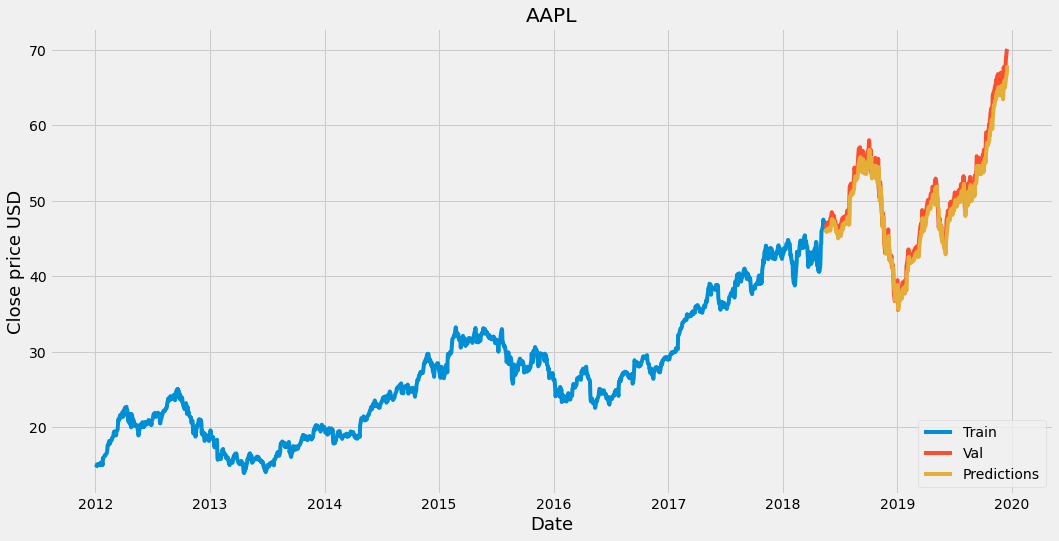

In [4]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
 
def LSTM_funct(company):
 
    plt.style.use('fivethirtyeight')
 
    df = web.DataReader(company, data_source='yahoo', start='2012-01-01', end= '2019-12-17')
 
    data = df.filter(['Close'])
    dataset = data.values
    training_data_len = math.ceil(len(dataset)*0.8)
 
 
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(dataset)
 
    train_data = scaled_data[0:training_data_len, :]
 
    x_train = []
    y_train = []
 
    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])
 
    x_train, y_train = np.array(x_train), np.array(y_train)
 
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
 
    model = Sequential()
    model.add(LSTM(50,return_sequences=True, input_shape = (x_train.shape[1], 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
 
    #rates = [0.001,0.0001,0.00001]
    stop = EarlyStopping(monitor='loss',min_delta=0.000000000001,patience=30)
 
    #for rate in rates:
    #    model.compile(optimizer='rmsprop', loss='mean_squared_error')
    #    model.fit(x_train, y_train, batch_size = 1, epochs = 3, callbacks=[stop], verbose=1)
 
 
    model.compile(optimizer='rmsprop', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size = 1, epochs = 3, callbacks=[stop], verbose=1)    
 
    test_data = scaled_data[training_data_len - 60: , :]
 
    x_test = []
    y_test = dataset[training_data_len: , :]
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])
 
    x_test = np.array(x_test)
 
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
 
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)
 
    #rmse = np.sqrt( np.mean( predictions - y_test )**2 )
 
    train = data[:training_data_len]
    valid = data[training_data_len:]
    valid['Predictions'] = predictions
 
    plt.figure(figsize=(16, 8))
    plt.title(company)
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close price USD', fontsize=18)
    plt.plot(train['Close'])
    plt.plot(valid[['Close', 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.show()
company=input()
LSTM_funct(company)

In [ ]:
 company_quote = web.DataReader(company, data_source='yahoo', start='2012-01-01', end='2019-12-17')
 
 
    new_df = company_quote.filter(['Close'])
 
 
    last_60_days = new_df[-60:].values
 
    last_60_days_scaled = scaler.transform(last_60_days)
 
 
 
    X_test = []
 
    X_test.append(last_60_days_scaled)
 
    X_test = np.array(X_test)
 
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
 
 
    pred_price = model.predict(X_test)
 
    pred_price = scaler.inverse_transform(pred_price)
    print(pred_price)